# Support Vector Machine (SVM)

Los vectores de soporte representan las <strong>fronteras de decisión en multiples dimensiones</strong> (2D, 3D, etc.) según sea mejor para la separación de los datos; esto se ve representado inicialmente sobre un vector donde los datos se mezclan entre sí, generando fronteras difusas; con el SVM estas <strong>fronteras se llevan a una dimensión mayor</strong> (de 1D a 2D, de 2D a 3D, etc) con el objetivo de generar un <strong>hiperplano</strong> donde el margen de los datos mantenga una separación lo más optima posible

![image.png](../../data/SVM.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

# El modelo de esta sección
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("../../data/iris_dataset.csv")
df["Class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [3]:
le = LabelEncoder()
df["Class"] = le.fit_transform(df["Class"])
df["Class"].unique()

array([0, 1, 2])

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df[["PetalLength", "PetalWidth"]], df["Class"], test_size=.25, random_state=7)

In [5]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [6]:
x_combined = np.vstack((x_train_sc, x_test_sc))
y_combined = np.hstack((y_train, y_test))

In [7]:
svm = SVC(kernel="linear", C=1.0)
svm.fit(x_train_sc, y_train)
y_pred = svm.predict(x_test_sc)
print(f"Precisión:\n{accuracy_score(y_test, y_pred)}\n\nMatriz de confusión:\n{confusion_matrix(y_test, y_pred)}\n\nReporte:\n{classification_report(y_test, y_pred)}")

Precisión:
1.0

Matriz de confusión:
[[10  0  0]
 [ 0 15  0]
 [ 0  0 13]]

Reporte:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [8]:
print(f"Validación cruzada:\n{cross_val_score(svm, x_combined, y_combined, cv=10)}")

Validación cruzada:
[1.         0.86666667 0.93333333 0.93333333 1.         0.93333333
 0.93333333 1.         1.         1.        ]


In [9]:
x_min, x_max = x_combined[:,0].min() -1, x_combined[:,0].max() +1
y_min, y_max = x_combined[:,1].min() -1, x_combined[:,1].max() +1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

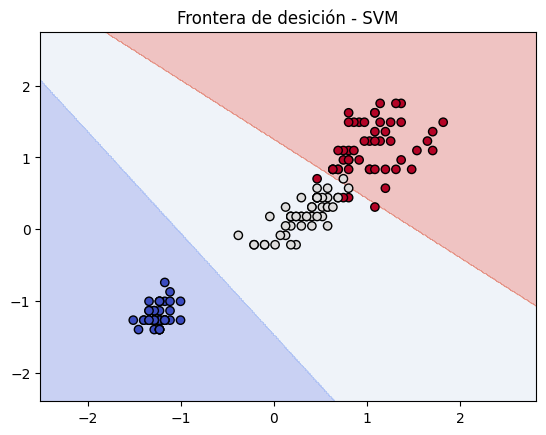

In [10]:
plt.contourf(xx, yy, z, alpha=.3, cmap="coolwarm")
plt.scatter(x_combined[:,0], x_combined[:,1], c=y_combined, edgecolors="k", cmap="coolwarm")
plt.title("Frontera de desición - SVM")
plt.show()

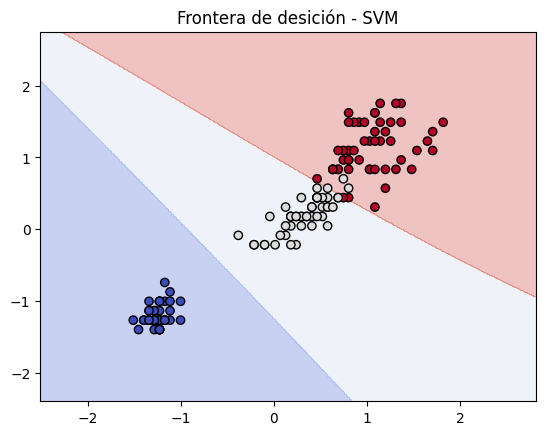

In [11]:
from graf_frontera import frontera
svm = SVC(kernel="sigmoid", gamma=.3)
svm.fit(x_train_sc, y_train)
frontera(x_combined, y_combined, svm)